# Helmet Safety Detection

## Pre-trained model inference (nano version)

### **1. Clone YOLOv10 source code**

In [1]:
# Install YOLOv10
!git clone https://github.com/THU-MIG/yolov10.git

Cloning into 'yolov10'...


### **2. Install the required packages**

In [2]:
# Install required libraries
%cd yolov10
%pip install -q -r requirements.txt
%pip install -e .

e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement torch==2.0.1 (from versions: 2.2.0, 2.2.1, 2.2.2, 2.3.0, 2.3.1, 2.4.0, 2.4.1, 2.5.0, 2.5.1, 2.6.0, 2.7.0, 2.7.1)
ERROR: No matching distribution found for torch==2.0.1


Obtaining file:///E:/AIO2024/AIO2024_Projects/Module_1/Helmet-Safety-Detection/yolov10
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for ultralytics (pyproject.toml): started
  Building editable for ultralytics (pyproject.toml): finished with status 'done'
  Created wheel for ultralytics: filename=ultralytics-8.1.34-0.editable-py3-none-any.whl size=21894 sha256=1da4bbd7d5b67d8d346ce1e2cedd15ceb694d813a4e04ec7f266142f1f405798
  Stored in directory: C:\Users\admin\AppData\Local\Temp\pip-ephem-wheel-cache-qcy08zk4\wheels\03\e5\

### **3. Download pre-trained weight**

In [3]:
import requests

# Download the nano version: yolov10n.pt
url = "https://github.com/THU-MIG/yolov10/releases/download/v1.1/yolov10n.pt"
response = requests.get(url)
with open("yolov10n.pt", "wb") as f:
    f.write(response.content)


### **4. Create YOLO model**

In [4]:
# Initialize the model
from ultralytics import YOLOv10
MODEL_PATH = 'yolov10n.pt'
model = YOLOv10(MODEL_PATH)
model.info()

YOLOv10n summary: 385 layers, 2775520 parameters, 2775504 gradients


(385, 2775520, 2775504, 0.0)

### **5. Run prediction with an image**

In [5]:
%cd ..
# Predict on image
img_before_path = './images/HCMC_Street.png'
result = model(source=img_before_path)[0]

# Save prediction result
img_after_path = './images/HCMC_Street_pre-trained_yolov10n_predict.png'
result.save(img_after_path)

e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection


c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]



image 1/1 e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\images\HCMC_Street.png: 448x640 8 persons, 2 bicycles, 1 car, 2 motorcycles, 1 backpack, 128.0ms
Speed: 4.0ms preprocess, 128.0ms inference, 2.0ms postprocess per image at shape (1, 3, 448, 640)


'./images/HCMC_Street_pre-trained_yolov10n_predict.png'

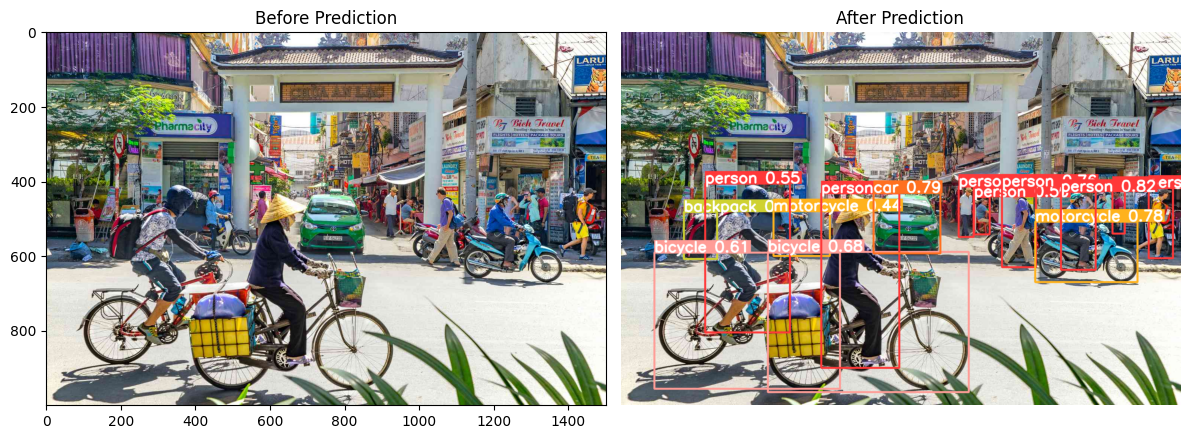

In [6]:
import matplotlib.pyplot as plt
import cv2

# Load the two images
img_before = cv2.imread(img_before_path)
img_after = cv2.imread(img_after_path)

# Convert BGR to RGB for correct color display in matplotlib
img_before_rgb = cv2.cvtColor(img_before, cv2.COLOR_BGR2RGB)
img_after_rgb = cv2.cvtColor(img_after, cv2.COLOR_BGR2RGB)

# Create a figure with 2 side-by-side subplots
plt.figure(figsize=(12, 6))  # Set the figure size

# Original image
plt.subplot(1, 2, 1)
plt.imshow(img_before_rgb)
plt.title("Before Prediction")
# plt.axis("off")

# Image after prediction
plt.subplot(1, 2, 2)
plt.imshow(img_after_rgb)
plt.title("After Prediction")
plt.axis('off')

# Display the figure
plt.tight_layout()
plt.show()


## Fine-tuning the model

### **1. Download the dataset**

In [9]:
import gdown
import zipfile
import os

# Define the URL
file_id = "1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the paths
output = "Safety_Helmet_Dataset.zip"
extract_dir = "safety_helmet_dataset"

# Download file
gdown.download(url, output, quiet=False)

# Extract file
os.makedirs(extract_dir, exist_ok=True)
with zipfile.ZipFile(output, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Remove zip file
os.remove(output)

Downloading...
From (original): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R
From (redirected): https://drive.google.com/uc?id=1twdtZEfcw4ghSZIiPDypJurZnNXzMO7R&confirm=t&uuid=9d4a8376-e1dc-4210-9664-65d388c85edb
To: e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\Safety_Helmet_Dataset.zip
100%|██████████| 33.7M/33.7M [00:04<00:00, 7.66MB/s]


### **2. Training the Model**

In [10]:
# Parameters of the model
YAML_PATH = './safety_helmet_dataset/data.yaml'
EPOCHS = 50
IMG_SIZE = 640
BATCH_SIZE = 64

In [14]:
# Train the model
model.train(data=YAML_PATH, epochs=EPOCHS, imgsz=IMG_SIZE, batch=BATCH_SIZE, save=True)

New https://pypi.org/project/ultralytics/8.3.152 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.12.3 torch-2.3.1+cpu CPU (AMD Ryzen 9 6900HS Creator Edition)
engine\trainer: task=detect, mode=train, model=yolov10n.pt, data=./safety_helmet_dataset/data.yaml, epochs=50, time=None, patience=100, batch=64, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=Fals

train: Scanning E:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\safety_helmet_dataset\train\labels.cache... 761 images, 0 backgrounds, 0 corrupt: 100%|██████████| 761/761 [00:00<?, ?it/s]
val: Scanning E:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\safety_helmet_dataset\valid\labels.cache... 218 images, 0 backgrounds, 0 corrupt: 100%|██████████| 218/218 [00:00<?, ?it/s]

Plotting labels to e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train2\labels.jpg... 



  6%|▌         | 2.10M/33.7M [02:40<40:25, 13.0kB/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to e:\AIO2024\AIO2024_Projects\Module_1\Helmet-Safety-Detection\yolov10\runs\detect\train2
Starting training for 50 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/50         0G      3.075      3.973      3.332      2.674      6.213      2.942        293        640:  33%|███▎      | 4/12 [01:45<03:31, 26.39s/it]


KeyboardInterrupt: 

### **3. Evaluating the Model**

In [ ]:
# Initialize the trained model
TRAINED_MODEL_PATH = './yolov10/runs/detect/train/weights/best.pt'
trained_model = YOLOv10(TRAINED_MODEL_PATH)
trained_model.val(data=YAML_PATH, imgsz=IMG_SIZE, split='val')

In [ ]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

IMAGE_URL = 'https://ips-dc.org/wp-content/uploads/2022/05/Black-Workers-Need-a-Bill-of-Rights.jpeg'
CONF_THRESHOLD = 0.3
results = trained_model.predict(source=IMAGE_URL,
                        imgsz=IMG_SIZE,
                        conf=CONF_THRESHOLD)
annotated_img = results[0].plot(show=False)

# Convert BGR to RGB for correct color display
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_img_rgb)
plt.axis('off')
plt.show()